##**Moubani Das**  
##**OasisInfobyte Aug-Sept '24**

##**Lv1 Project-3  Data Cleaning**

Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Uploading and reading the file


In [8]:
from google.colab import files
uploaded = files.upload()

Saving NYC.csv to NYC (1).csv


In [9]:
df=pd.read_csv('NYC.csv')


df.head() df.tail() methods

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


Identifying datatypes

In [12]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


Converting columns 'neighbourhood_group','neighbourhood' and 'room_type' from object to categorical datatype since all of them hold categorical data.


In [13]:
df['neighbourhood_group']=df['neighbourhood_group'].astype('category')
df['neighbourhood']=df['neighbourhood'].astype('category')
df['room_type']=df['room_type'].astype('category')

In [14]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,category
neighbourhood,category
latitude,float64
longitude,float64
room_type,category
price,int64


##Statistical Information

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  int64   
 1   name                            48879 non-null  object  
 2   host_id                         48895 non-null  int64   
 3   host_name                       48874 non-null  object  
 4   neighbourhood_group             48895 non-null  category
 5   neighbourhood                   48895 non-null  category
 6   latitude                        48895 non-null  float64 
 7   longitude                       48895 non-null  float64 
 8   room_type                       48895 non-null  category
 9   price                           48895 non-null  int64   
 10  minimum_nights                  48895 non-null  int64   
 11  number_of_reviews               48895 non-null  int64   
 12  last_review       

Checking for duplicates

In [16]:
df.duplicated().sum()

0

##Checking missing values

In [17]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Since 'name' column is insignificant for future analysis, its null values can be replaced with N/A

In [18]:
df['name'].fillna('N/A', inplace=True)

Since the 'reviews_per_month' column has missing values,
it is understandable that it holds no reviews and we can replace it with 0 as well.

In [19]:
df['reviews_per_month'].fillna(0, inplace=True)

The columns 'id','host_name' and 'last_review' are irrelevant for our further analysis, thus it may be dropped.

In [20]:
df.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [21]:
df.isnull().sum()

,0
name,0
host_id,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0


Shape of dataset

In [22]:
df.shape

(48895, 13)

##Visual Exploratory Data Analysis

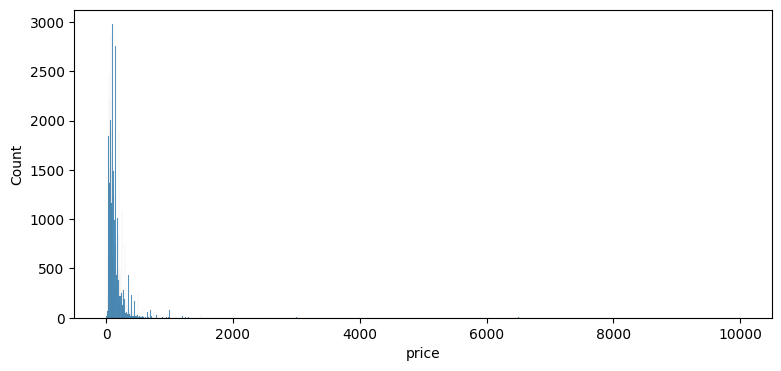

In [ ]:
#Checking the distribution of price
plt.figure(figsize = (9,4))
sns.histplot(df['price'])
plt.show()

Interpretation: It appears that the price distribution is heavily skewed to the right, with a long tail of expensive listings.Most listings are concentrated in the lower price range, with a peak around 0-50. This suggests that there are a few very expensive listings that are driving up the average price.

##Identifying and removing extremely high-priced listings that might be distorting the analysis.

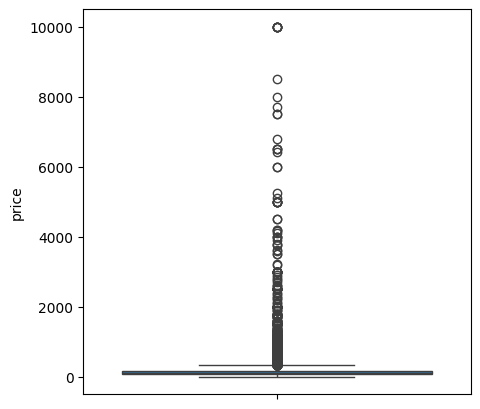

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['price'])
plt.show()

Transforming the outliers to compress the values and make the distribution more symmetrical

In [ ]:
df['price_log'] = np.log(df['price'] + 1)  # Add 1 to handle 0 prices
df = df[['price_log'] + [col for col in df.columns if col != 'price_log']]

In [ ]:
df.describe()

,price_log,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,4.736885,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.695344,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,4.248495,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,4.672829,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,5.170484,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,9.210440,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


*   A significant change is visible between the 'price' and 'price_log' columns
*  Columns 'minimum_nights','number_of_reviews','reviews_per_month' and 'calculated_host_listings_count' depicts
that their maximum value is much higher than 75%



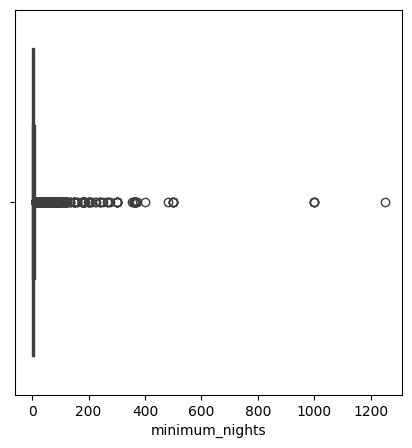

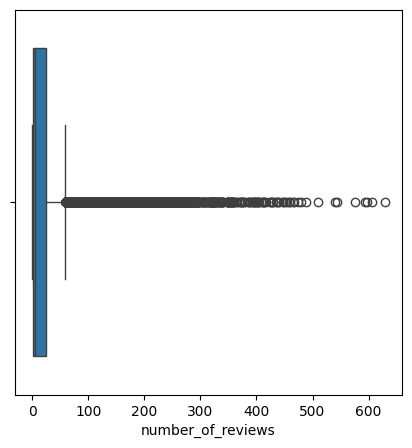

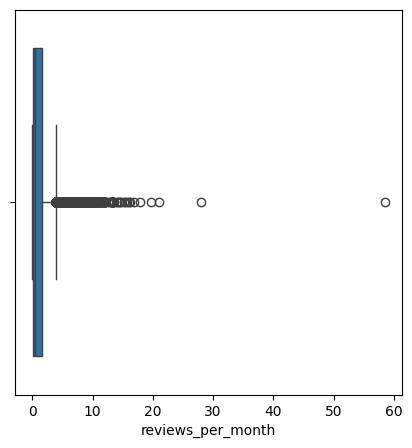

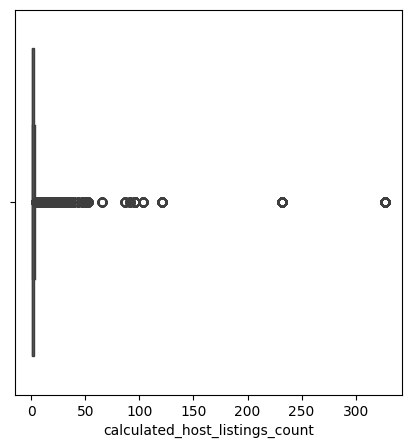

In [ ]:
out_cols=['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count']
for col in out_cols:
  plt.figure(figsize=(5,5))
  sns.boxplot(x=df[col])
  plt.show()

In [24]:
for col in out_cols:
  df[col+'_log'] = np.log1p(df[col])
  df = df[[col+'_log'] + [c for c in df.columns if c != col+'_log']]

In [32]:
df.describe()

,calculated_host_listings_count_log,reviews_per_month_log,number_of_reviews_log,minimum_nights_log,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.087216,0.542640,1.990775,1.499881,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.858668,0.577769,1.564185,0.869823,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.693147,0.000000,0.000000,0.693147,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.693147,0.039221,0.693147,0.693147,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,0.693147,0.314811,1.791759,1.386294,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.098612,0.947789,3.218876,1.791759,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,5.793014,4.085976,6.445720,7.131699,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000
